In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_data_partition
import pandas as pd

In [2]:
data_partition = 'freesound_features_random_split_with_brass.data'

In [3]:
data = load_data_partition(data_partition)

In [4]:
data.get_features_names()

Index(['average_loudness', 'barkbands_crest_dmean', 'barkbands_crest_dmean2',
       'barkbands_crest_dvar', 'barkbands_crest_dvar2', 'barkbands_crest_max',
       'barkbands_crest_mean', 'barkbands_crest_median', 'barkbands_crest_min',
       'barkbands_crest_stdev',
       ...
       'zerocrossingrate_dmean', 'zerocrossingrate_dmean2',
       'zerocrossingrate_dvar', 'zerocrossingrate_dvar2',
       'zerocrossingrate_max', 'zerocrossingrate_mean',
       'zerocrossingrate_median', 'zerocrossingrate_min',
       'zerocrossingrate_stdev', 'zerocrossingrate_var'],
      dtype='object', length=2646)

In [5]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# LightGBM

In [6]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669160
[LightGBM] [Info] Number of data points in the train set: 6658, number of used features: 2642
[LightGBM] [Info] Start training from score -1.610640
[LightGBM] [Info] Start training from score -3.235230
[LightGBM] [Info] Start training from score -1.529788
[LightGBM] [Info] Start training from score -1.513282
[LightGBM] [Info] Start training from score -1.657590
[LightGBM] [Info] Start training from score -2.013477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

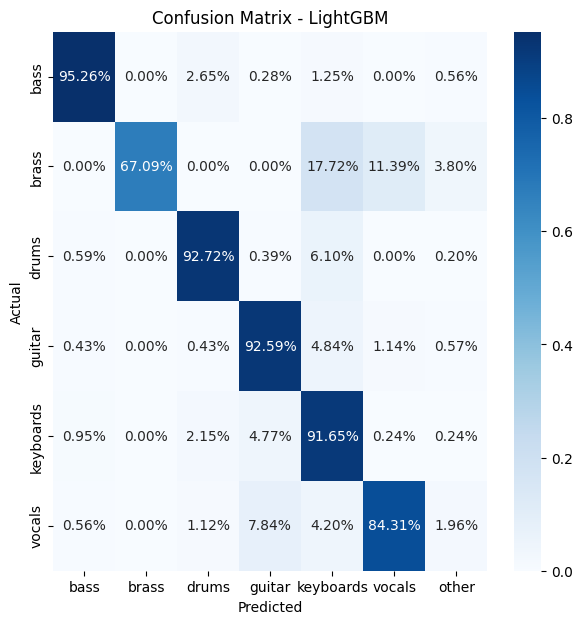

In [7]:
plot_confusion_matrix(y_test, X_test, lgbm)

In [8]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.98      0.95      0.97       718
       brass       1.00      0.67      0.80        79
       drums       0.93      0.93      0.93       508
      guitar       0.93      0.93      0.93       702
   keyboards       0.79      0.92      0.85       419
      vocals       0.94      0.84      0.89       357

   micro avg       0.92      0.91      0.92      2783
   macro avg       0.93      0.87      0.89      2783
weighted avg       0.93      0.91      0.92      2783



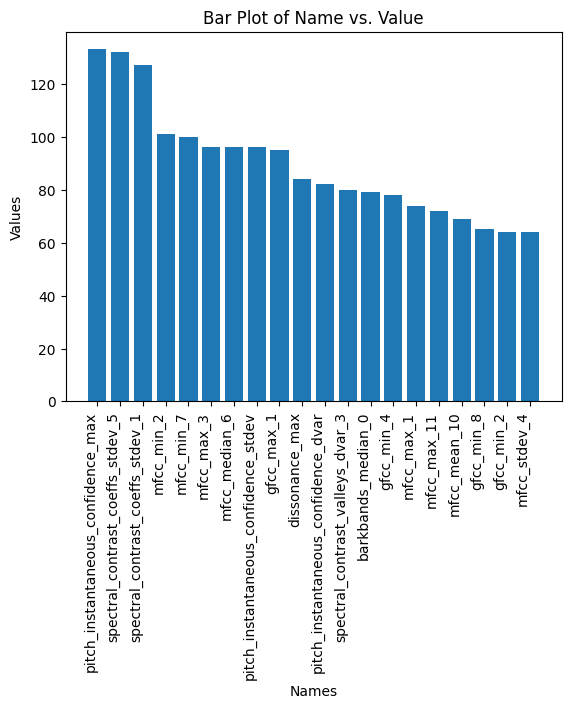

In [9]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [12]:
lgbm.save_model('../models/', 'lgbm_fe_rs_wbrass_271023')